# Calculating cross entropy loss values for different overlap percentages

### In probability and information theory, the cross-entropy loss $H(p, q)$ between two probability distributions $p$ and $q$ is defined as:
## $$H(p, q) = -\sum_{i} p(i) \ln(q(i))$$
> ### Where...
> ### $p(i)$ is the true probability distribution (often represented as a vector or array).
> ### $q(i)$ is the predicted probability distribution (often represented as a vector or array).

In [47]:
import pandas as pd
import numpy as np

In [35]:
zero_overlap = pd.read_csv('filtered_zero_overlap.csv')
fifty_overlap = pd.read_csv('filtered_fifty_overlap.csv')
seventy_overlap = pd.read_csv('filtered_seventy_overlap.csv')

In [7]:
zero_overlap

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,more than one?,talking or other sounds?
0,273072621,2.512462e-01,0.000000e+00,7.487538e-01,0,pik,0,0
1,561220301,0.000000e+00,0.000000e+00,1.000000e+00,0,pik,0,0
2,309454251,1.000000e+00,0.000000e+00,0.000000e+00,0,laugh,0,0
3,239810171,2.820000e-14,3.844195e-02,9.615581e-01,0,pik,0,1
4,347229281,1.000000e+00,0.000000e+00,0.000000e+00,0,laugh,0,0
...,...,...,...,...,...,...,...,...
62,616587785,2.705461e-02,7.022236e-01,2.707218e-01,0,drum,0,1
63,376246401,1.000000e+00,0.000000e+00,1.180000e-24,0,laugh,0,0
64,462975991,1.000000e+00,0.000000e+00,4.090000e-36,0,laugh,0,0
65,222959451,5.529619e-02,4.690000e-13,9.447038e-01,0,pik,0,1


## Cross entropy loss function

In [73]:
def cross_entropy_loss(df, threshold = 1e-10):
    
    prob_cols = {
        'laugh': 'p_laugh',
        'drum': 'p_drum',
        'pik': 'p_pik'
    }
    
    ce_losses = []
    
    for index, row in df.iterrows():
        truth_value = row['truth'] 
        prob_column = prob_cols.get(truth_value) 
        
        if prob_column is None:
            ce_loss = np.nan
        else:
            probability = row[prob_column]
            if probability == 0:
                ce_loss = -np.log(threshold)
            else:
                ce_loss = -np.log(probability)
    
        ce_losses.append(ce_loss)
    
    df['CE_loss'] = ce_losses 
    
    return df


In [74]:
fifty_overlap

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,more than one?,talking or other sounds?
0,273072621,0.167592,0.000000e+00,0.832408,0.5,pik,0,0
1,561220301,0.000000,0.000000e+00,1.000000,0.5,pik,0,0
2,309454251,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0
3,239810171,0.037080,1.853224e-02,0.944388,0.5,pik,0,1
4,347229281,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0
...,...,...,...,...,...,...,...,...
67,616587785,0.026624,7.049360e-01,0.270000,0.5,drum,0,1
68,376246401,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0
69,462975991,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0
70,222959451,0.027961,2.370000e-13,0.970000,0.5,pik,0,1


In [63]:
merged = pd.merge(zero_overlap, fifty_overlap, on='unique_id', how = 'inner')
in_common_nums = merged['unique_id'].tolist()

In [64]:
fifty_filtered = fifty_overlap[fifty_overlap['unique_id'].isin(in_common_nums)].reset_index(drop=True)

In [34]:
fifty_filtered.to_csv('true_fifty_filtered.csv')

In [66]:
seventy_filtered = seventy_overlap[seventy_overlap['unique_id'].isin(in_common_nums)].reset_index(drop=True)

In [77]:
cross_entropy_loss(zero_overlap)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,more than one?,talking or other sounds?,CE_loss
0,273072621,2.512462e-01,0.000000e+00,7.487538e-01,0,pik,0,0,0.289345
1,561220301,0.000000e+00,0.000000e+00,1.000000e+00,0,pik,0,0,-0.000000
2,309454251,1.000000e+00,0.000000e+00,0.000000e+00,0,laugh,0,0,-0.000000
3,239810171,2.820000e-14,3.844195e-02,9.615581e-01,0,pik,0,1,0.039200
4,347229281,1.000000e+00,0.000000e+00,0.000000e+00,0,laugh,0,0,-0.000000
...,...,...,...,...,...,...,...,...,...
62,616587785,2.705461e-02,7.022236e-01,2.707218e-01,0,drum,0,1,0.353503
63,376246401,1.000000e+00,0.000000e+00,1.180000e-24,0,laugh,0,0,-0.000000
64,462975991,1.000000e+00,0.000000e+00,4.090000e-36,0,laugh,0,0,-0.000000
65,222959451,5.529619e-02,4.690000e-13,9.447038e-01,0,pik,0,1,0.056884


In [78]:
cross_entropy_loss(fifty_filtered)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,more than one?,talking or other sounds?,CE_loss
0,273072621,0.167592,0.000000e+00,0.832408,0.5,pik,0,0,0.183433
1,561220301,0.000000,0.000000e+00,1.000000,0.5,pik,0,0,-0.000000
2,309454251,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0,-0.000000
3,239810171,0.037080,1.853224e-02,0.944388,0.5,pik,0,1,0.057219
4,347229281,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0,-0.000000
...,...,...,...,...,...,...,...,...,...
62,616587785,0.026624,7.049360e-01,0.270000,0.5,drum,0,1,0.349648
63,376246401,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0,-0.000000
64,462975991,1.000000,0.000000e+00,0.000000,0.5,laugh,0,0,-0.000000
65,222959451,0.027961,2.370000e-13,0.970000,0.5,pik,0,1,0.030459


In [79]:
cross_entropy_loss(seventy_filtered)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,more than one?,talking or other sounds?,CE_loss
0,273072621,0.190087,0.000000e+00,8.099128e-01,0.7,pik,0,0,0.210829
1,561220301,0.000000,0.000000e+00,1.000000e+00,0.7,pik,0,0,-0.000000
2,309454251,1.000000,0.000000e+00,0.000000e+00,0.7,laugh,0,0,-0.000000
3,239810171,0.066008,1.341555e-03,9.326509e-01,0.7,pik,0,1,0.069724
4,347229281,1.000000,0.000000e+00,1.080000e-36,0.7,laugh,0,0,-0.000000
...,...,...,...,...,...,...,...,...,...
62,616587785,0.038725,6.890807e-01,2.720000e-01,0.7,drum,0,1,0.372397
63,376246401,0.857145,0.000000e+00,1.428548e-01,0.7,laugh,0,0,0.154148
64,462975991,1.000000,0.000000e+00,1.360000e-36,0.7,laugh,0,0,-0.000000
65,222959451,0.051586,6.050000e-09,9.480000e-01,0.7,pik,0,1,0.053401


In [80]:
print(f'best ce = {min(sum(zero_overlap["CE_loss"]), sum(fifty_filtered["CE_loss"]), sum(seventy_filtered["CE_loss"]))}')

best ce = 33.27708599264804


# Overlap values of 0.1, 0.2, 0.3, 0.4

In [99]:
def rename_columns(df):
    df = df.rename(columns = {'p(laugh)':'p_laugh', 'p(drum)':'p_drum', 'p(pik)':'p_pik'})
    return df

In [100]:
ten_overlap = pd.read_csv('ce_loss_01_overlap .csv')
twenty_overlap = pd.read_csv('ce_loss_02_overlap - Sheet1.csv')
thirty_overlap = pd.read_csv('ce_loss_03_overlap - Sheet1.csv')
fourty_overlap = pd.read_csv('ce_loss_04_overlap - Sheet1.csv')

In [107]:
ten_new = rename_columns(ten_overlap)
twenty_new = rename_columns(twenty_overlap)
thirty_new = rename_columns(thirty_overlap)
fourty_new = rename_columns(fourty_overlap)

In [108]:
cross_entropy_loss(ten_new)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,CE_loss
0,273072621,0.488561,0.000000e+00,5.114392e-01,0.1,pik,0.670527
1,561220301,0.000000,0.000000e+00,1.000000e+00,0.1,pik,-0.000000
2,309454251,1.000000,0.000000e+00,0.000000e+00,0.1,laugh,-0.000000
3,239810171,0.033315,2.070000e-26,9.666851e-01,0.1,pik,0.033882
4,347229281,1.000000,0.000000e+00,0.000000e+00,0.1,laugh,-0.000000
...,...,...,...,...,...,...,...
62,616587785,0.045305,6.569341e-01,2.977605e-01,0.1,drum,0.420172
63,376246401,1.000000,0.000000e+00,1.180000e-24,0.1,laugh,-0.000000
64,462975991,1.000000,0.000000e+00,4.090000e-36,0.1,laugh,-0.000000
65,222959451,0.046457,5.470000e-20,9.535430e-01,0.1,pik,0.047571


In [109]:
cross_entropy_loss(twenty_new)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,CE_loss
0,273072621,3.340437e-01,0.000000e+00,6.659563e-01,0.2,pik,0.406531
1,561220301,0.000000e+00,0.000000e+00,1.000000e+00,0.2,pik,-0.000000
2,309454251,1.000000e+00,0.000000e+00,0.000000e+00,0.2,laugh,-0.000000
3,239810171,3.420000e-14,3.123978e-02,9.687602e-01,0.2,pik,0.031738
4,347229281,1.000000e+00,0.000000e+00,0.000000e+00,0.2,laugh,-0.000000
...,...,...,...,...,...,...,...
62,616587785,3.798429e-02,6.894443e-01,2.725715e-01,0.2,drum,0.371869
63,376246401,1.000000e+00,0.000000e+00,1.180000e-24,0.2,laugh,-0.000000
64,462975991,1.000000e+00,0.000000e+00,4.090000e-36,0.2,laugh,-0.000000
65,222959451,4.212372e-02,2.380000e-22,9.578763e-01,0.2,pik,0.043037


In [110]:
cross_entropy_loss(thirty_new)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,CE_loss
0,273072621,0.051409,0.000000e+00,9.485908e-01,0.3,pik,0.052778
1,561220301,0.000000,0.000000e+00,1.000000e+00,0.3,pik,-0.000000
2,309454251,1.000000,0.000000e+00,0.000000e+00,0.3,laugh,-0.000000
3,239810171,0.047960,1.477354e-02,9.372665e-01,0.3,pik,0.064788
4,347229281,1.000000,0.000000e+00,0.000000e+00,0.3,laugh,-0.000000
...,...,...,...,...,...,...,...
62,616587785,0.017830,7.309973e-01,2.511731e-01,0.3,drum,0.313346
63,376246401,1.000000,0.000000e+00,7.850000e-25,0.3,laugh,-0.000000
64,462975991,1.000000,0.000000e+00,2.060000e-36,0.3,laugh,-0.000000
65,222959451,0.038470,3.540000e-15,9.615303e-01,0.3,pik,0.039229


In [111]:
cross_entropy_loss(fourty_new)

,unique_id,p_laugh,p_drum,p_pik,overlap,truth,CE_loss
0,273072621,0.002214,0.000000e+00,9.977855e-01,0.4,pik,0.002217
1,561220301,0.000000,0.000000e+00,1.000000e+00,0.4,pik,-0.000000
2,309454251,1.000000,0.000000e+00,0.000000e+00,0.4,laugh,-0.000000
3,239810171,0.062633,1.200000e-12,9.373674e-01,0.4,pik,0.064680
4,347229281,1.000000,0.000000e+00,0.000000e+00,0.4,laugh,-0.000000
...,...,...,...,...,...,...,...
62,616587785,0.032293,6.773217e-01,2.903856e-01,0.4,drum,0.389609
63,376246401,1.000000,0.000000e+00,7.850000e-25,0.4,laugh,-0.000000
64,462975991,1.000000,0.000000e+00,2.050000e-36,0.4,laugh,-0.000000
65,222959451,0.064977,1.720000e-22,9.350228e-01,0.4,pik,0.067184


In [113]:
print(f'Cross entropy loss for overlap of 0% = {sum(zero_overlap["CE_loss"])}')
print(f'Cross entropy loss for overlap of 10% = {sum(ten_new["CE_loss"])}')
print(f'Cross entropy loss for overlap of 20% = {sum(twenty_new["CE_loss"])}')
print(f'Cross entropy loss for overlap of 30% = {sum(thirty_new["CE_loss"])}')
print(f'Cross entropy loss for overlap of 40% = {sum(fourty_new["CE_loss"])}')    
print(f'Cross entropy loss for overlap of 50% = {sum(fifty_filtered["CE_loss"])}')
print(f'Cross entropy loss for overlap of 70% = {sum(seventy_filtered["CE_loss"])}')

Cross entropy loss for overlap of 0% = 33.27708599264804
Cross entropy loss for overlap of 10% = 32.969202989102726
Cross entropy loss for overlap of 20% = 33.437409967514654
Cross entropy loss for overlap of 30% = 87.4476317865251
Cross entropy loss for overlap of 40% = 68.26672862038693
Cross entropy loss for overlap of 50% = 42.46368418085971
Cross entropy loss for overlap of 70% = 68.5883902376048


In [116]:
ce_sums = {0 : sum(zero_overlap["CE_loss"]),
      10 : sum(ten_new["CE_loss"]), 
      20 : sum(twenty_new["CE_loss"]),
      30 : sum(thirty_new["CE_loss"]),
      40 : sum(fourty_new["CE_loss"]), 
      50 : sum(fifty_filtered["CE_loss"]), 
      70 : sum(seventy_filtered["CE_loss"])
     }
ce_df = pd.DataFrame(list(ce_sums.items()), columns=['Overlap', 'CE_loss_sum'])

,Overlap,CE_loss_sum
0,0,33.277086
1,10,32.969203
2,20,33.437410
3,30,87.447632
4,40,68.266729
5,50,42.463684
6,70,68.588390


Text(0.5, 1.0, 'Overlap percentages and corresponding cross entropy loss values')

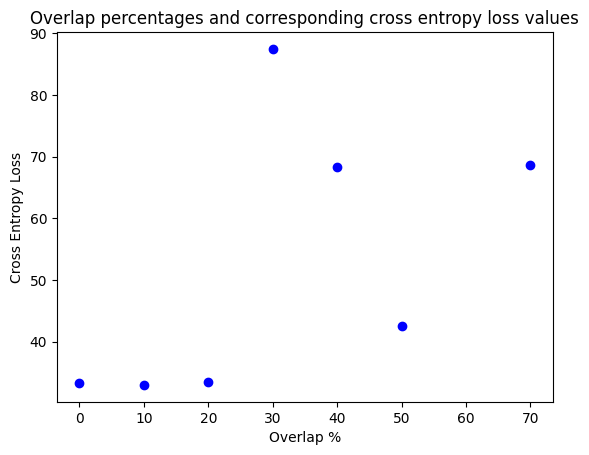

In [136]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,5))
plt.scatter(ce_df['Overlap'], ce_df['CE_loss_sum'], c = 'b')
plt.xlabel('Overlap %')
plt.ylabel('Cross Entropy Loss')
plt.title('Overlap percentages and corresponding cross entropy loss values')